In [1]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:


# load all datasets as dataframe
data1 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/Udemy.csv')
data2 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/skillshare.csv')
data3 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/edx.csv')
data4 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/Coursera.csv')
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

In [4]:
print(f'df1:{df1.head()}')
print(f'df2:{df2.head()}')
print(f'df3:{df3.head()}')
print(f'df4:{df4.head()}')

df1:                                               title  \
0  The Complete Python Bootcamp From Zero to Hero...   
1         The Complete 2023 Web Development Bootcamp   
2                    The Web Developer Bootcamp 2023   
3  100 Days of Code: The Complete Python Pro Boot...   
4  React - The Complete Guide 2023 (incl. React R...   

                                         description  \
0  Learn Python like a Professional  Start from t...   
1  Become a Full-Stack Web Developer with just ON...   
2  10 Hours of React just added. Become a Develop...   
3  Master Python by building 100 projects in 100 ...   
4  Dive in and learn React.js from scratch! Learn...   

                                          instructor  rating  reviewcount  \
0                                      Jose Portilla     4.6       486391   
1                                      Dr. Angela Yu     4.7       338555   
2                                        Colt Steele     4.7       266527   
3             

In [5]:
print(f'df1:{df1.shape}')
print(f'df2:{df2.shape}')
print(f'df3:{df3.shape}')
print(f'df4:{df4.shape}')

df1:(26256, 8)
df2:(14250, 5)
df3:(816, 10)
df4:(1139, 9)


In [6]:
print(f'df1:{df1.columns}')
print(f'df2:{df2.columns}')
print(f'df3:{df3.columns}')
print(f'df4:{df4.columns}')

df1:Index(['title', 'description', 'instructor', 'rating', 'reviewcount',
       'duration', 'lectures', 'level'],
      dtype='object')
df2:Index(['title', 'link', 'duration', 'instructor', 'students'], dtype='object')
df3:Index(['title', 'link', 'institution', 'subject', 'level', 'prerequisites',
       'language', 'videotranscript', 'associatedprograms',
       'associatedskills'],
      dtype='object')
df4:Index(['partner', 'course', 'skills', 'rating', 'reviewcount', 'level',
       'certificatetype', 'duration', 'crediteligibility'],
      dtype='object')


**Data Processing**

In [7]:
# Since all the four data frames as different columns, I will take the union of 4 dataframes and generate synthetic data if any of dataframe misses a certain column which exist in other dataframe

In [8]:
# Combine all unique column names
all_columns = set(df1.columns).union(set(df2.columns), set(df3.columns), set(df4.columns))
print(all_columns)
print(len(all_columns))   # eventually we have 22 features in my dataframe for clustering

{'skills', 'link', 'certificatetype', 'associatedskills', 'title', 'instructor', 'rating', 'partner', 'associatedprograms', 'subject', 'lectures', 'level', 'videotranscript', 'institution', 'prerequisites', 'course', 'reviewcount', 'language', 'description', 'crediteligibility', 'duration', 'students'}
22


In [9]:
# concatenate any columns appears more than once on all dfs and make it as a list. It will be used as later sythetic data generation
dfs = [df1, df2, df3, df4]

# 1. Concatenate DataFrames
df_combined = pd.concat(dfs, ignore_index=True, sort=False)

# 2. Fill the NaN in each column by the random selection from that columns to make a complete dataframe
def fill_nan_with_random(df):
    for col in df.columns:
        if df[col].isna().any():  # If NaN values exist in the column
            non_nan_values = df[col].dropna().values
            if len(non_nan_values) > 0:  # Ensure there are non-NaN values to sample from
                df[col] = df[col].apply(lambda x: np.random.choice(non_nan_values) if pd.isna(x) else x)
    return df

df_combined = fill_nan_with_random(df_combined)
print(df_combined.head())
print(df_combined.isna().sum())

                                               title  \
0  The Complete Python Bootcamp From Zero to Hero...   
1         The Complete 2023 Web Development Bootcamp   
2                    The Web Developer Bootcamp 2023   
3  100 Days of Code: The Complete Python Pro Boot...   
4  React - The Complete Guide 2023 (incl. React R...   

                                         description  \
0  Learn Python like a Professional  Start from t...   
1  Become a Full-Stack Web Developer with just ON...   
2  10 Hours of React just added. Become a Develop...   
3  Master Python by building 100 projects in 100 ...   
4  Dive in and learn React.js from scratch! Learn...   

                                          instructor  rating reviewcount  \
0                                      Jose Portilla     4.6      486391   
1                                      Dr. Angela Yu     4.7      338555   
2                                        Colt Steele     4.7      266527   
3                     

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               42461 non-null  object 
 1   description         42461 non-null  object 
 2   instructor          42461 non-null  object 
 3   rating              42461 non-null  float64
 4   reviewcount         42461 non-null  object 
 5   duration            42461 non-null  object 
 6   lectures            42461 non-null  object 
 7   level               42461 non-null  object 
 8   link                42461 non-null  object 
 9   students            42461 non-null  object 
 10  institution         42461 non-null  object 
 11  subject             42461 non-null  object 
 12  prerequisites       42461 non-null  object 
 13  language            42461 non-null  object 
 14  videotranscript     42461 non-null  object 
 15  associatedprograms  42461 non-null  object 
 16  asso

In [11]:
for col in df_combined.columns:
    print(f"{col}: {df_combined[col].apply(type).value_counts()}")

title: title
<class 'str'>    42461
Name: count, dtype: int64
description: description
<class 'str'>    42461
Name: count, dtype: int64
instructor: instructor
<class 'str'>    42461
Name: count, dtype: int64
rating: rating
<class 'float'>    42461
Name: count, dtype: int64
reviewcount: reviewcount
<class 'int'>    40920
<class 'str'>     1541
Name: count, dtype: int64
duration: duration
<class 'str'>    42461
Name: count, dtype: int64
lectures: lectures
<class 'str'>    42461
Name: count, dtype: int64
level: level
<class 'str'>    42461
Name: count, dtype: int64
link: link
<class 'str'>    42461
Name: count, dtype: int64
students: students
<class 'str'>    42461
Name: count, dtype: int64
institution: institution
<class 'str'>    42461
Name: count, dtype: int64
subject: subject
<class 'str'>    42461
Name: count, dtype: int64
prerequisites: prerequisites
<class 'str'>    42461
Name: count, dtype: int64
language: language
<class 'str'>    42461
Name: count, dtype: int64
videotranscript: 

In [12]:
df_combined['reviewcount'] = df_combined['reviewcount'].str.replace('k', '000')
df_combined['reviewcount'] = df_combined['reviewcount'].str.replace(',', '')
df_combined['reviewcount'] = df_combined['reviewcount'].astype(float)

In [13]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               42461 non-null  object 
 1   description         42461 non-null  object 
 2   instructor          42461 non-null  object 
 3   rating              42461 non-null  float64
 4   reviewcount         1541 non-null   float64
 5   duration            42461 non-null  object 
 6   lectures            42461 non-null  object 
 7   level               42461 non-null  object 
 8   link                42461 non-null  object 
 9   students            42461 non-null  object 
 10  institution         42461 non-null  object 
 11  subject             42461 non-null  object 
 12  prerequisites       42461 non-null  object 
 13  language            42461 non-null  object 
 14  videotranscript     42461 non-null  object 
 15  associatedprograms  42461 non-null  object 
 16  asso

In [14]:
# Fill NaN values (e.g., with 0 or the median value)
df_combined['reviewcount'].fillna(df_combined['reviewcount'].median(), inplace=True)

<ipython-input-14-6f2b29d465a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['reviewcount'].fillna(df_combined['reviewcount'].median(), inplace=True)


In [15]:
#enumerate categorical and boonlean data
categorical_columns = df_combined.select_dtypes(include=['object']).columns

# Use LabelEncoder for enumerating the categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_combined[col] = label_encoder.fit_transform(df_combined[col])

# Step 2: Scaling Numerical Variables
# Identify numerical columns
numerical_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns

# Use StandardScaler to scale the numerical columns
scaler = StandardScaler()
df_combined[numerical_columns] = scaler.fit_transform(df_combined[numerical_columns])

# Step 3: Convert the boolean column to integers
df_combined['crediteligibility'] = df_combined['crediteligibility'].astype(int)

# Now the data is ready for clustering
print(df_combined.head())


      title  description  instructor    rating  reviewcount  duration  \
0  1.324358    -0.064382   -0.130100  0.643377    -0.028913 -0.329773   
1  1.281884    -1.346006   -0.849960  0.882225    -0.028913  1.442451   
2  1.411523    -1.717871   -1.079636  0.882225    -0.028913  1.743659   
3 -1.715771     0.737635   -0.849960  0.882225    -0.028913  1.169262   
4  0.906697    -0.845476   -1.718892  0.643377    -0.028913  1.747161   

   lectures     level      link  students  ...  prerequisites  language  \
0 -1.104211 -0.603707  0.757366 -0.275671  ...      -0.862401  1.664790   
1  0.163418 -0.603707  1.280594 -0.792037  ...       1.658693 -0.401888   
2  1.373665 -0.603707 -1.366647 -0.584807  ...       1.702922  1.664790   
3  1.196301 -0.603707  0.753450 -1.612067  ...       1.691865 -0.401888   
4  1.399748 -0.603707  1.667197 -0.941817  ...      -0.010979 -0.401888   

   videotranscript  associatedprograms  associatedskills   partner    course  \
0        -0.404682            

**Model for Clustering**

Number of clusters formed: 5


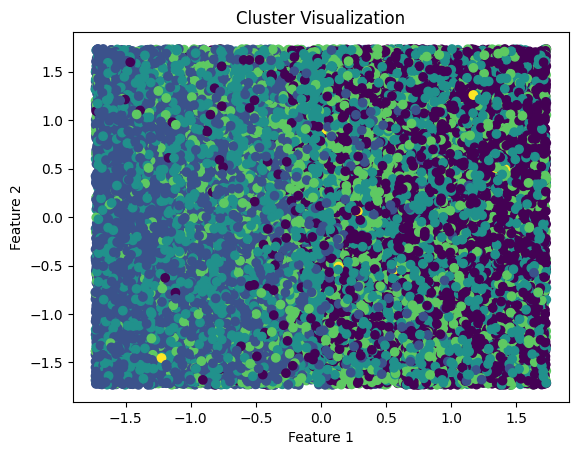

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_combined.select_dtypes(include=[int, float]))

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Set the desired number of clusters
df_combined['cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Check the number of clusters formed
number_of_clusters = df_combined['cluster'].nunique()
print(f"Number of clusters formed: {number_of_clusters}")
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_combined['cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [17]:

# Step 3: Create the features (X) and labels (y) for KNN
X = scaled_data
y = df_combined['cluster']

# Step 4: Split the dataset into train and test sets for KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Set the number of neighbors
knn.fit(X_train, y_train)

# Step 6: Predict the clusters for the test set
y_pred = knn.predict(X_test)

# Step 7: Evaluate the KNN classifier accuracy
accuracy = knn.score(X_test, y_test)
print(f"KNN Classifier Accuracy: {accuracy * 100:.2f}%")

KNN Classifier Accuracy: 84.81%
